This notebook tests the performance of the **Optimal Innovation Vector Fusion (with Consensus)** algorithm for distributed estimation.

In [1]:
import os
import settings.input

# Choose target and sensor-network
input_files = []
input_files.append(os.path.join("settings","json_files", "target-rotating.json"))
input_files.append(os.path.join("settings","json_files", "sensor-network-1.json"))

# Read input files
input_data = settings.input.read(input_files)

Consider a network of sensors connected as,

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


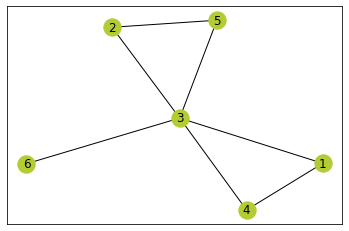

In [2]:
from sim.helpers import show_graph
show_graph(input_data["network"]["adjacency"])

In [3]:
input_data["network"]["noise_covariances"]["6"] = [[200, 0], [0, 200]]

Estimating a target moving in circles (with system noise) <br>
KCF & O-IVF:

KCF Scheme : 
Plotted history of target coordinates.
Plotted history of sensor 6's estimates.


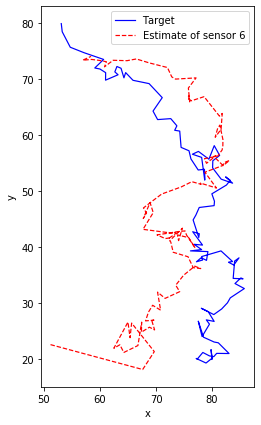

OIVF Scheme : 
Plotted history of target coordinates.
Plotted history of sensor 6's estimates.


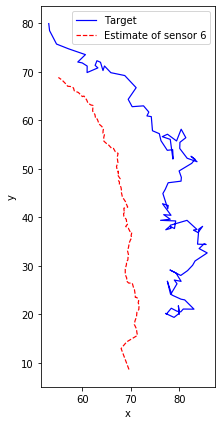

In [4]:
from sim.simulation import simulate_many
sensor_initials = {"estimate_prior": [[10], [0]],
                   "ErrCov_prior": [[500,0],[0,500]]}

results = simulate_many(input_data, duration = 100, est_schemes=["KCF", "OIVF"], 
                        sensor_initials=sensor_initials)
print("KCF Scheme : ")
results[0].plot_xy(target=True, estimates_of="6")
print("OIVF Scheme : ")
results[1].plot_xy(target=True, estimates_of="6")

In [5]:
###### DEBUG
# results[0].plot_timeseries(ErrCov_of="6")
# results[1].plot_timeseries(ErrCov_of="6")

In [6]:
# results_2 = simulate(input_data, duration = 150, est_scheme="OIVF")
# results_2.plot_xy(target=True, estimates_of="6")